# Visualization: using non-linear minimization to perform least-squares fit

code largely borrowed from Computer Programming course

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from GradDesc_codes.function_examples import g, grad_g, k, grad_k

Suppose that we have some non-linear function that depends on a real input x
and on some parameters a, b, c

In [3]:
def s(x, a, b, c):
    """
    sinusoidal function with parameters a, b, and c
    """
    return a + b * np.sin(c * x)

In [4]:
## Choose some arbitrary "true" values for the parameters a, b, c
a_true, b_true, c_true = 0.5, 1.2, 3.5

Since these parameters are what we are going to try to optimize, and
since all our optimizers work on numpy arrays, we also store them
in an array, for later.
We use the letter z to denote out optimization variable, not to be
confused with x which is the input to the function `s`.

In [5]:
z_true = np.array([a_true, b_true, c_true])

## Visualizing the chosen function

First, we create a static visualization using matplotlib

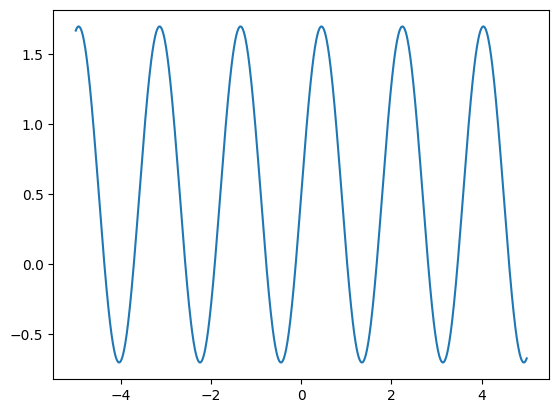

In [6]:
## Plot the true function, using a fine-grained subdivision of the x axis
## (in a realistic setting, we wouldn't have this of course)
x_fine = np.linspace(-5, 5, 1000)
y_fine = s(x_fine, a_true, b_true, c_true)
plt.clf()
plt.plot(x_fine, y_fine, '-', label="true")
plt.show()

Now, we move on to animated visualizations - as if the function is constructed little by little.

We first use matplotlibs own animation module to achieve this goal

MovieWriter Pillow unavailable; using Pillow instead.


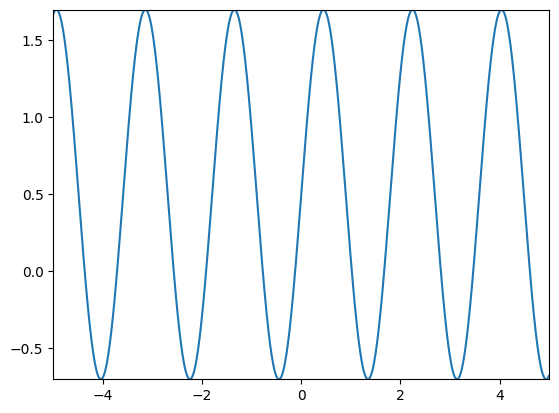

In [21]:
import matplotlib.animation as animation

# Create a figure and an axis
plt.close('all')                   # close the previous figures
fig, ax = plt.subplots()

# Initialize a line object that will be updated during the animation
line, = ax.plot([], [], '-', label="true")

# Set the limits of the plot
ax.set_xlim(-5, 5)
ax.set_ylim(np.min(y_fine), np.max(y_fine))

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Update function for the animation
def update(i):
    line.set_data(x_fine[:i], y_fine[:i])
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(x_fine), init_func=init, blit=True)

ani.save('sinusoidal_function.gif', writer='Pillow', fps=30)

plt.show()

## method 2: ipyiwidgets
Not currently working for this example. Idk why

In [19]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Define the function
def f(t):
    y = s(t, a_true, b_true, c_true)
    plt.figure()
    plt.plot(t, y, '-')
    plt.ylim([np.min(y_fine), np.max(y_fine)])
    plt.show()



In [20]:
# Create the slider
widgets.interact(f, t=widgets.FloatSlider(min=-5, max=5, step=0.1))

interactive(children=(FloatSlider(value=0.0, description='t', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

<function __main__.f(t)>

## Generating synthetic noisy data
  2) we pick few values of x and get the corresponding function output,
     using the true values of a, b, c
  3) we add some "noise" (random jitter) to the output values
  4) this gives us some data points (an array of x and a corresponding array
     of y)
  5) now we want to see if we can recover the original values of a, b, c by
     just knowing the data points x,y and the general shape of the function s.
     At least, we wish to get something close to the true values.

In [22]:
## Now pick some inputs (we just take them with linrange but they could be
## random or have any other form)
x_train = np.linspace(-5, 5, 60)

## Now we evaluate the output, but add some Gaussian noise to it
np.random.seed(4627323) # make the simulation reproducible
y_train = s(x_train, a_true, b_true, c_true) + 0.1 * np.random.randn(len(x_train))

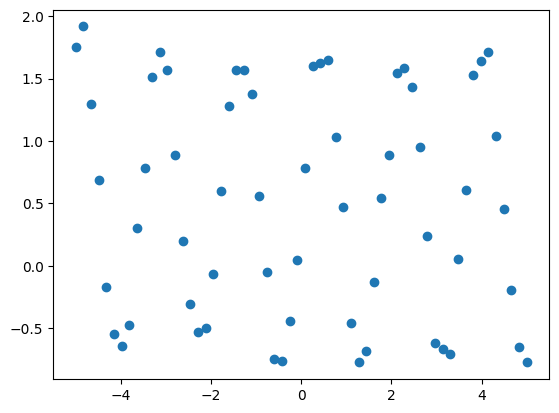

In [23]:
## Let's plot our data points
plt.plot(x_train, y_train, 'o', label="data")
plt.show()